# Loding Packages

In [183]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Loding Data

In [184]:
train = pd.read_csv("train_house.csv")
test = pd.read_csv("test_house.csv")

In [185]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [105]:
test.loc[test["Exterior1st"]==-1,"Exterior1st"]

691    -1
Name: Exterior1st, dtype: object

### 데이터 타입 종류: int, object

# Data descirbe
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality


GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


# Meta Data


#### -role: input, price
#### -level: , ordinal,nominal	
#### -keep: True, False
#### -dtype: int, object

In [186]:
data = []

for f in train.columns:
# defining the role
    if f == "SalePrice":
        role = "Price"
    elif f == "Id":
        role = "id"
    else:
        role = "input"
# defining the level    
    if train[f].dtype == "int64":
        level = "ordinal"
    elif train[f].dtype == object:
        level = "nominal"
    elif train[f].dtype == float:
        level = "ordinal"
    
    keep = True
    if f == "SalePrice":
        keep = False
    elif f == "Id":
        keep = False
        
 #defining dtype       
    dtype = train[f].dtype
    
    f_dict= {
        "varname" : f,
        "role" : role,
        "level": level,
        "keep" : keep,
        "dtype": dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)
meta.head()

,role,level,keep,dtype
varname,,,,
Id,id,ordinal,False,int64
MSSubClass,input,ordinal,True,int64
MSZoning,input,nominal,True,object
LotFrontage,input,ordinal,True,float64
LotArea,input,ordinal,True,int64


###  Below the number of variables per role and level are displayed.

In [187]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,Price,ordinal,1
1,id,ordinal,1
2,input,nominal,43
3,input,ordinal,36


# Descriptive statistics

## Ordinal Variable

In [188]:
v = meta[(meta["level"] == "ordinal") & (meta["keep"])].index

In [189]:
train[v].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


#### Total count : 1460
#### LotFrontage has 259 missing data
#### MasVnrArea has 8 missing data 

## Nominal Variable

In [190]:
v = meta[(meta["level"] == "nominal") & (meta["keep"])].index

In [191]:
train[v].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


#### when data is not number, descrbie shows like this
#### Garage type has 91 missing data (number of garage-> Finish, Qual, cond 1379)
#### drop columns: PoolQc, Fence, MiscFeature, Alley

# Data Quailty Check

### Checking missing Value

In [192]:
train.loc[train["Alley"].notnull(), "Alley"].count()

91

In [193]:
vars_with_missing =[]
for f in train.columns:
    missings = 1460 - train.loc[train[f].notnull(),f].count()
    if missings > 0:
        
        train.loc[train[f].isnull(),f] = -1
        vars_with_missing.append(missings)
        missings_perc = missings/train.shape[0]
        
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
print("In total, There are {} Variables with missing data".format(len(vars_with_missing)))


    

Variable LotFrontage has 259 records (17.74%) with missing values
Variable Alley has 1369 records (93.77%) with missing values
Variable MasVnrType has 8 records (0.55%) with missing values
Variable MasVnrArea has 8 records (0.55%) with missing values
Variable BsmtQual has 37 records (2.53%) with missing values
Variable BsmtCond has 37 records (2.53%) with missing values
Variable BsmtExposure has 38 records (2.60%) with missing values
Variable BsmtFinType1 has 37 records (2.53%) with missing values
Variable BsmtFinType2 has 38 records (2.60%) with missing values
Variable Electrical has 1 records (0.07%) with missing values
Variable FireplaceQu has 690 records (47.26%) with missing values
Variable GarageType has 81 records (5.55%) with missing values
Variable GarageYrBlt has 81 records (5.55%) with missing values
Variable GarageFinish has 81 records (5.55%) with missing values
Variable GarageQual has 81 records (5.55%) with missing values
Variable GarageCond has 81 records (5.55%) with m

In [194]:
vars_with_missing =[]
for f in test.columns:
    missings = 1459 - test.loc[test[f].notnull(),f].count()
    if missings > 0:
        
        test.loc[test[f].isnull(),f] = -1
        vars_with_missing.append(missings)
        missings_perc = missings/test.shape[0]
        
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
print("In total, There are {} Variables with missing data".format(len(vars_with_missing)))

Variable MSZoning has 4 records (0.27%) with missing values
Variable LotFrontage has 227 records (15.56%) with missing values
Variable Alley has 1352 records (92.67%) with missing values
Variable Utilities has 2 records (0.14%) with missing values
Variable Exterior1st has 1 records (0.07%) with missing values
Variable Exterior2nd has 1 records (0.07%) with missing values
Variable MasVnrType has 16 records (1.10%) with missing values
Variable MasVnrArea has 15 records (1.03%) with missing values
Variable BsmtQual has 44 records (3.02%) with missing values
Variable BsmtCond has 45 records (3.08%) with missing values
Variable BsmtExposure has 44 records (3.02%) with missing values
Variable BsmtFinType1 has 42 records (2.88%) with missing values
Variable BsmtFinSF1 has 1 records (0.07%) with missing values
Variable BsmtFinType2 has 42 records (2.88%) with missing values
Variable BsmtFinSF2 has 1 records (0.07%) with missing values
Variable BsmtUnfSF has 1 records (0.07%) with missing value

In [163]:
v =["MSZoning","Utilities","Exterior1st","Exterior2nd ","MasVnrType",",BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
   "BsmtFinType2","BsmtFinType2","KitchenQual","Functional","GarageType","GarageFinish","GarageCond","SaleType"]

# Select colums for dropping

### Alley, FireplaceQu, PoolQC,Fence ,MiscFeature

In [195]:
## Droping variable with too many mssing values
vars_to_drop = ["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"]
train.drop(vars_to_drop, inplace=True, axis=1)
test.drop(vars_to_drop, inplace= True, axis =1)
meta.loc[vars_to_drop, "keep"] = False


# Imputing with the mean or mode (sklearn function)
mean_imp = Imputer(missing_values = -1, strategy = 'mean', axis = 0)

train['LotFrontage'] = mean_imp.fit_transform(train[['LotFrontage']]).ravel()
train['MasVnrArea'] = mean_imp.fit_transform(train[['MasVnrArea']]).ravel()
train['GarageYrBlt'] = mean_imp.fit_transform(train[['GarageYrBlt']]).ravel()



In [196]:
test['LotFrontage'] = mean_imp.fit_transform(test[['LotFrontage']]).ravel()
test['MasVnrArea'] = mean_imp.fit_transform(test[['MasVnrArea']]).ravel()
test['GarageYrBlt'] = mean_imp.fit_transform(test[['GarageYrBlt']]).ravel()
test['BsmtFinSF1'] = mean_imp.fit_transform(test[['BsmtFinSF1']]).ravel()
test['BsmtFinSF2'] = mean_imp.fit_transform(test[['BsmtFinSF2']]).ravel()
test['BsmtUnfSF'] = mean_imp.fit_transform(test[['BsmtUnfSF']]).ravel()
test['TotalBsmtSF'] = mean_imp.fit_transform(test[['TotalBsmtSF']]).ravel()
test['BsmtFullBath'] = mean_imp.fit_transform(test[['BsmtFullBath']]).ravel()
test['GarageCars'] = mean_imp.fit_transform(test[['GarageCars']]).ravel()
test['GarageArea'] = mean_imp.fit_transform(test[['GarageArea']]).ravel()

In [166]:
test.shape

(1459, 75)

In [198]:
train.loc[train["GarageType"] == -1,"GarageType"] = "Attchd"
train.loc[train["GarageFinish"] == -1,"GarageFinish"] = "Unf"
train.loc[train["GarageQual"] == -1,"GarageQual"] = "TA"
train.loc[train["GarageCond"] == -1,"GarageCond"] = "TA"
train.loc[train["BsmtQual"] == -1,"BsmtQual"] = "TA"
train.loc[train["BsmtCond"] == -1,"BsmtCond"] = "TA"
train.loc[train["BsmtExposure"] == -1,"BsmtExposure"] = "No	"
train.loc[train["BsmtFinType2"] == -1,"BsmtFinType2"] = "Unf"
train.loc[train["BsmtFinType1"] == -1,"BsmtFinType1"] = "Unf"
train.loc[train["BsmtExposure"] == -1,"BsmtExposure"] = "No"
train.loc[train["Electrical"] == -1,"Electrical"] = "SBrkr"

In [129]:
v =["MSZoning","Utilities","Exterior1st","Exterior2nd","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
   "BsmtFinType2","BsmtFinType2","KitchenQual","Functional","GarageType","GarageFinish","GarageCond","SaleType"]

In [131]:
test[v].describe()

,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinType2,KitchenQual,Functional,GarageType,GarageFinish,GarageCond,SaleType
count,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
unique,6,2,14,16,5,5,5,5,7,7,7,5,8,7,4,6,10
top,RL,AllPub,VinylSd,VinylSd,None,TA,TA,No,GLQ,Unf,Unf,TA,Typ,Attchd,Unf,TA,WD
freq,1114,1457,510,510,878,634,1295,951,431,1237,1237,757,1357,853,625,1328,1258


In [199]:
test.loc[test["MSZoning"] == -1,"MSZoning"] = "RL"
test.loc[test["Utilities"] == -1,"Utilities"] = "AllPub"
test.loc[test["Exterior1st"] == -1,"Exterior1st"] = "VinylSd"
test.loc[test["Exterior2nd"] == -1,"Exterior2nd"] = "VinylSd"
test.loc[test["MasVnrType"] == -1,"MasVnrType"] = "None"
test.loc[test["BsmtQual"] == -1,"BsmtQual"] = "TA"
test.loc[test["BsmtCond"] == -1,"BsmtCond"] = "TA"
test.loc[test["BsmtExposure"] == -1,"BsmtExposure"] = "No"
test.loc[test["BsmtFinType1"] == -1,"BsmtFinType1"] = "GLQ"
test.loc[test["BsmtFinType2"] == -1,"BsmtFinType2"] = "Unf"
test.loc[test["KitchenQual"] == -1,"KitchenQual"] = "TA	"
test.loc[test["GarageType"] == -1,"GarageType"] = "Attchd"
test.loc[test["Functional"] == -1,"Functional"] = "Typ"
test.loc[test["GarageFinish"] == -1,"GarageFinish"] = "Unf"
test.loc[test["GarageCond"] == -1,"GarageCond"] = "TA"
test.loc[test["SaleType"] == -1,"SaleType"] = "WD"

# Checking the cardinality of the categorical variables

In [200]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable MSZoning has 5 distinct values
Variable Street has 2 distinct values
Variable LotShape has 4 distinct values
Variable LandContour has 4 distinct values
Variable Utilities has 2 distinct values
Variable LotConfig has 5 distinct values
Variable LandSlope has 3 distinct values
Variable Neighborhood has 25 distinct values
Variable Condition1 has 9 distinct values
Variable Condition2 has 8 distinct values
Variable BldgType has 5 distinct values
Variable HouseStyle has 8 distinct values
Variable RoofStyle has 6 distinct values
Variable RoofMatl has 8 distinct values
Variable Exterior1st has 15 distinct values
Variable Exterior2nd has 16 distinct values
Variable MasVnrType has 5 distinct values
Variable ExterQual has 4 distinct values
Variable ExterCond has 5 distinct values
Variable Foundation has 6 distinct values
Variable BsmtQual has 4 distinct values
Variable BsmtCond has 4 distinct values
Variable BsmtExposure has 5 distinct values
Variable BsmtFinType1 has 6 distinct values
Va

# Exploratory Data Visualization

## Categorical variable

In [23]:
v = meta[(meta["level"] =="nominal") & meta["keep"]].index

C:\Users\WoolBae\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


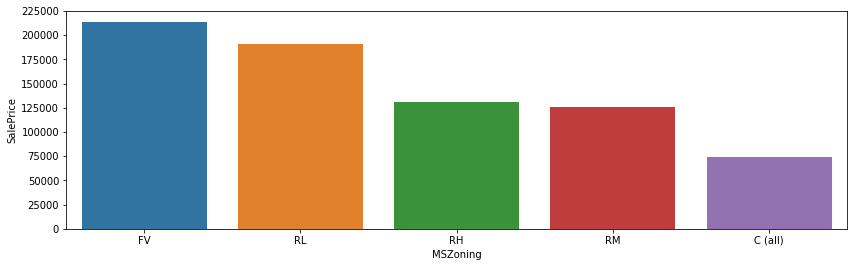

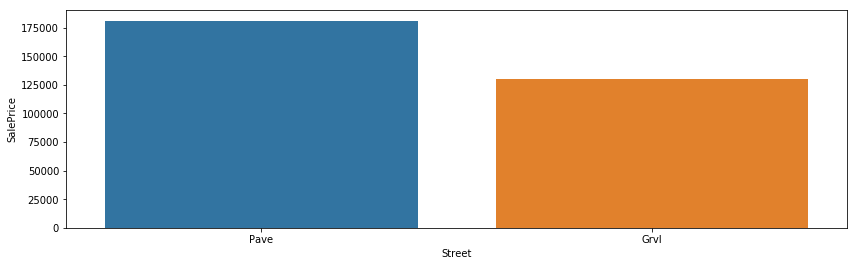

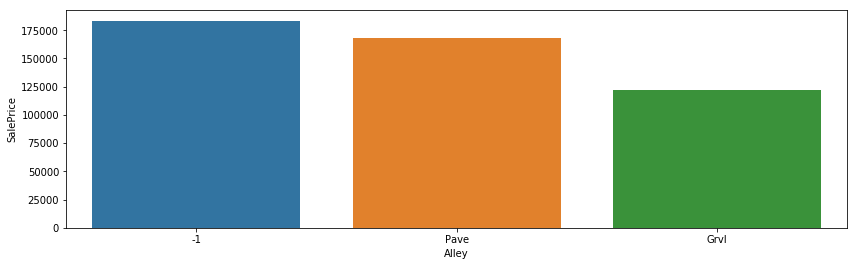

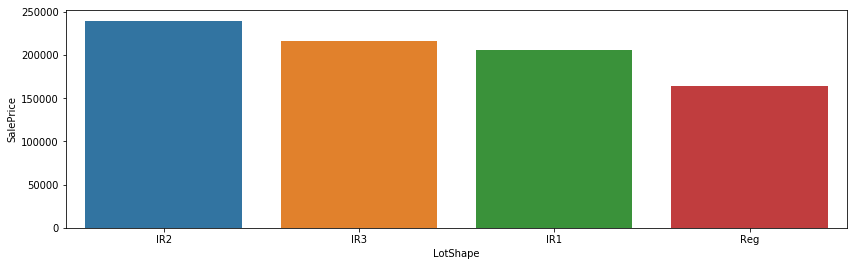

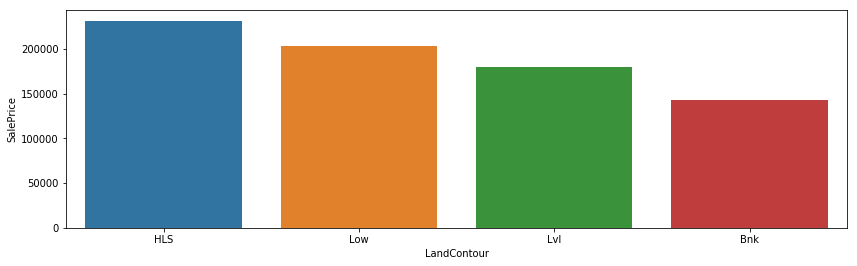

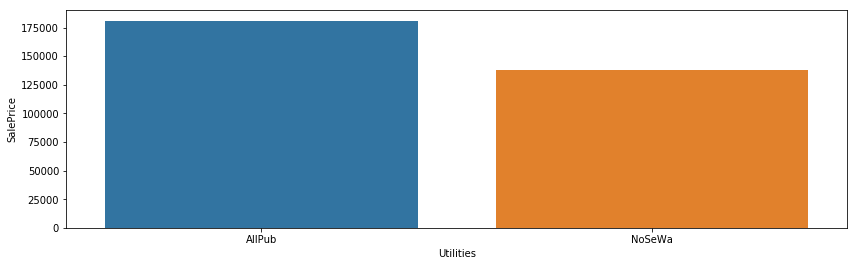

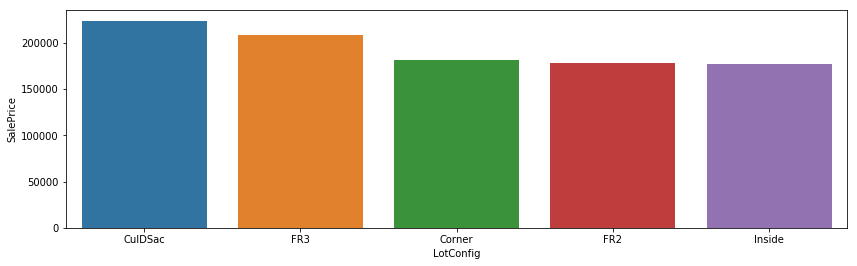

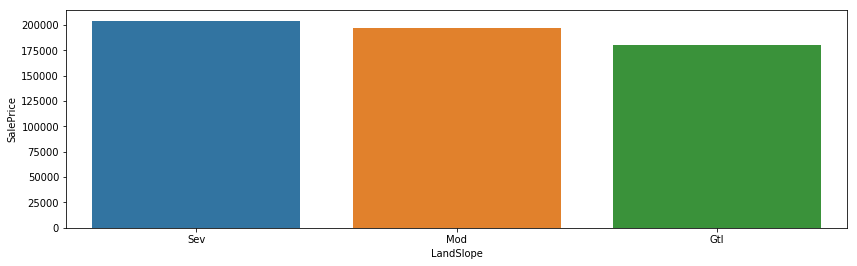

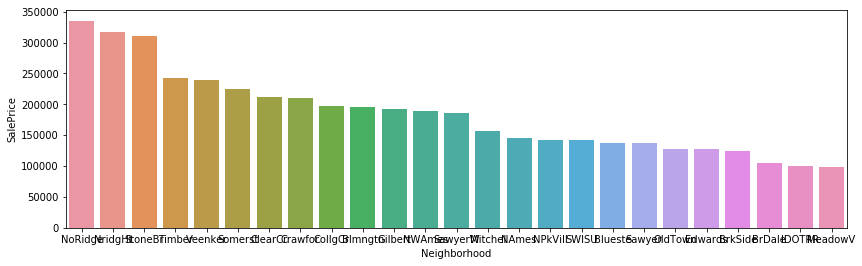

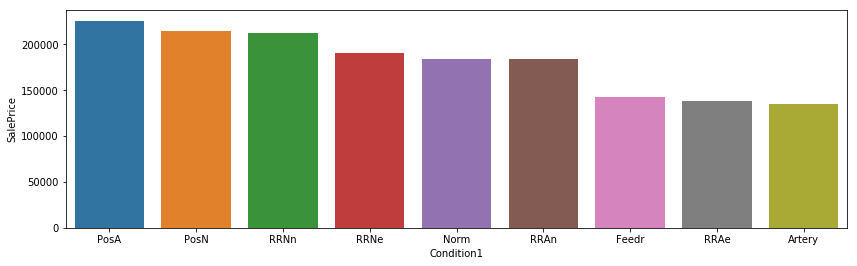

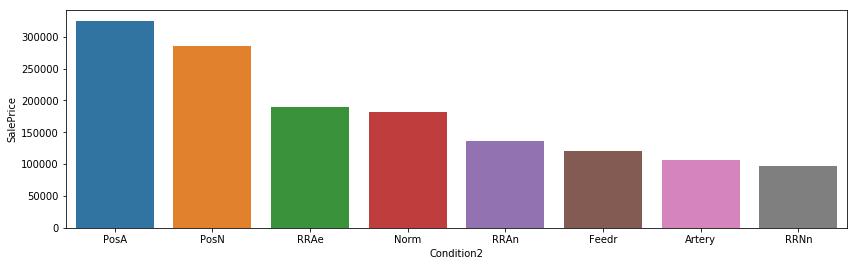

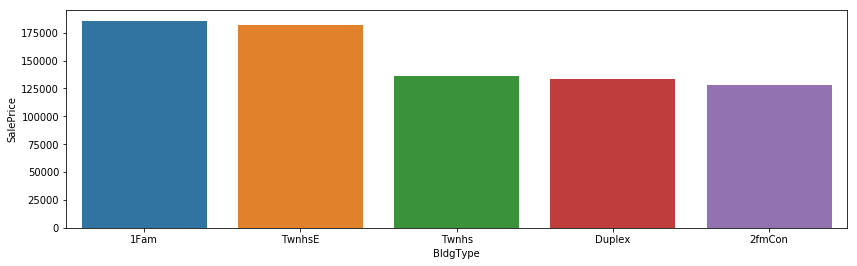

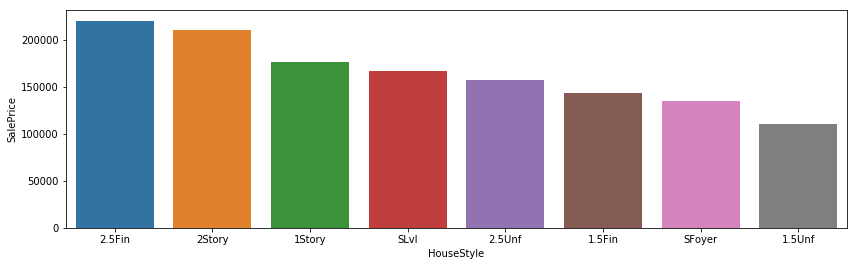

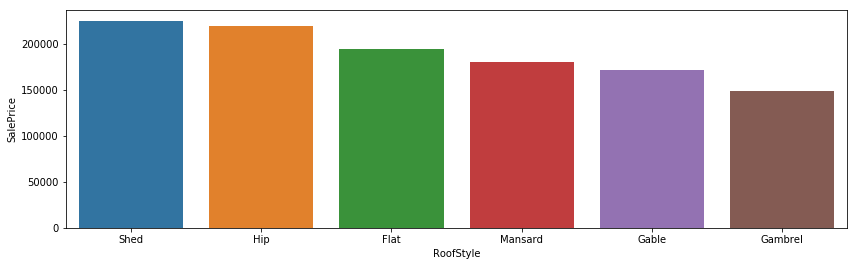

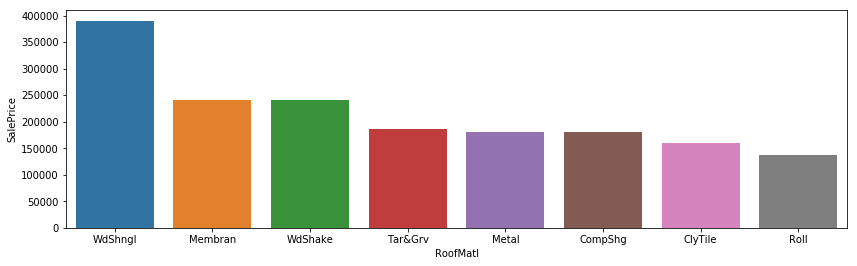

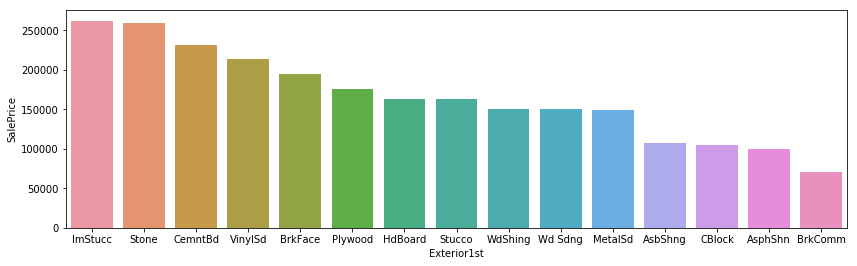

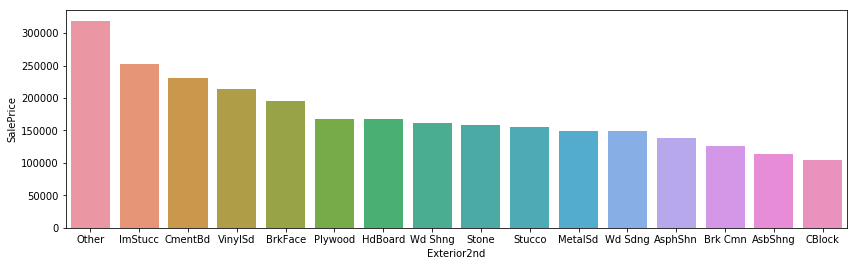

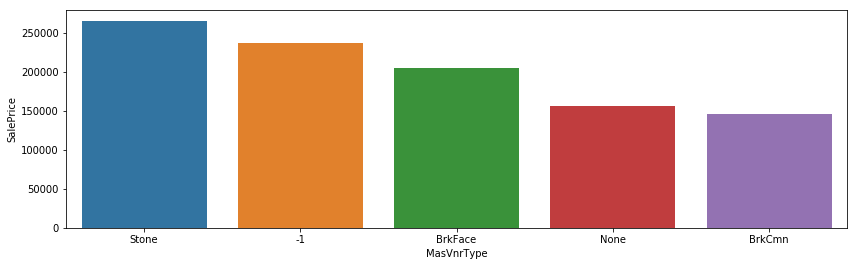

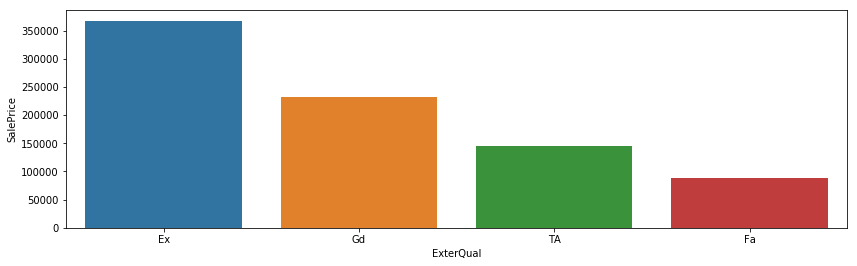

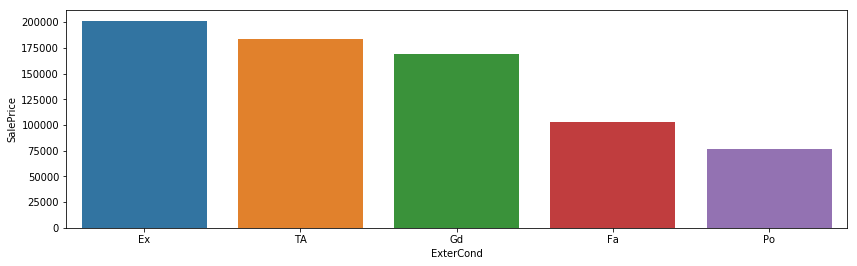

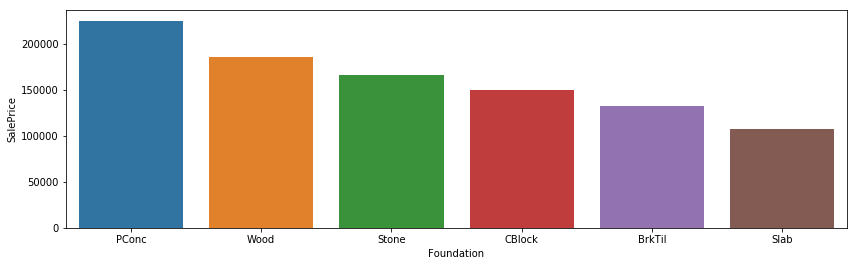

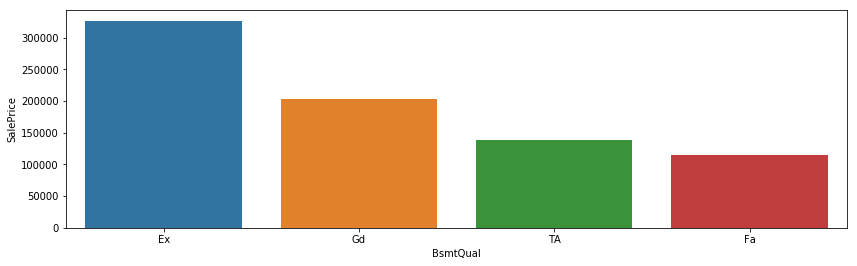

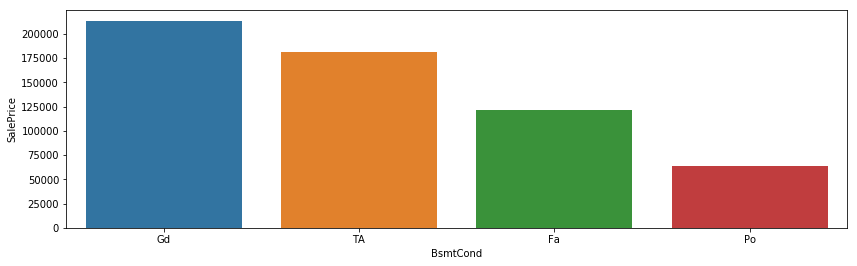

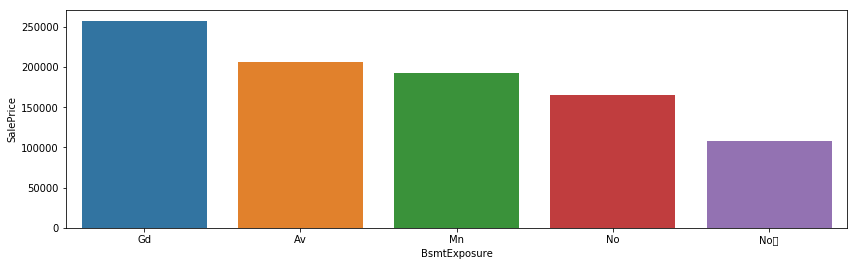

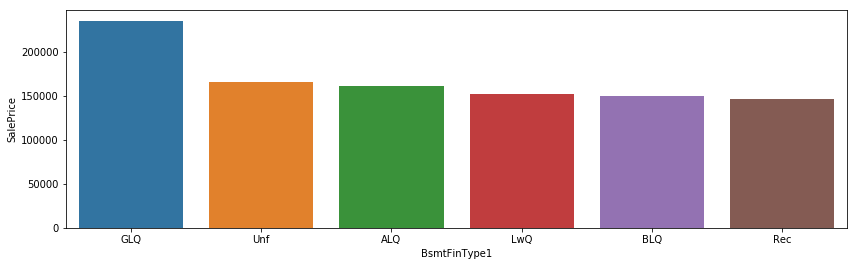

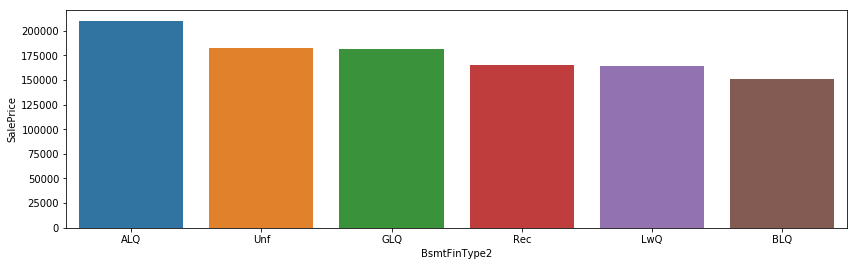

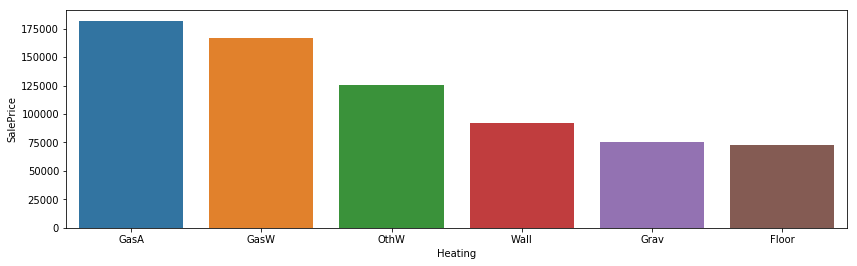

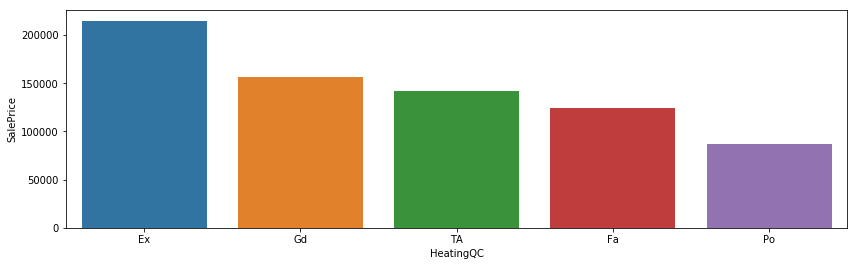

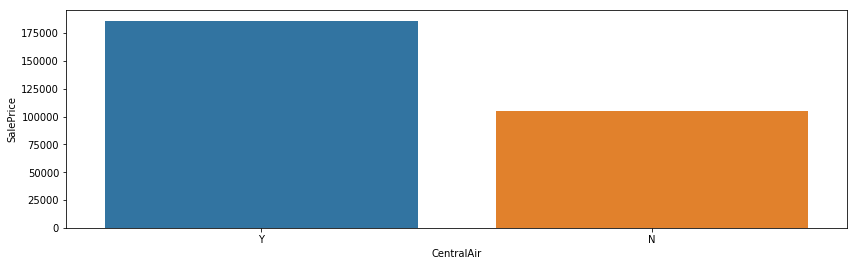

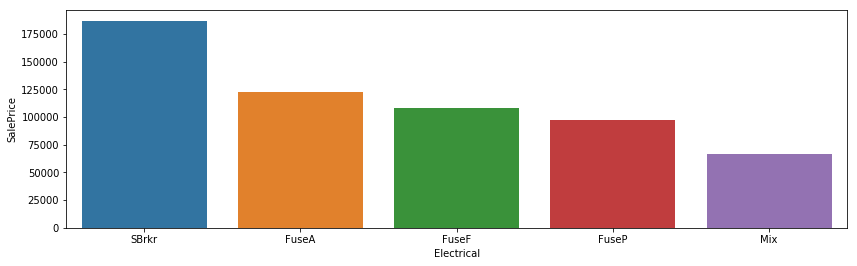

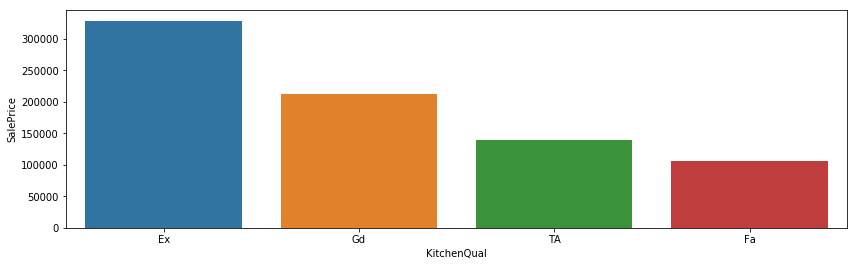

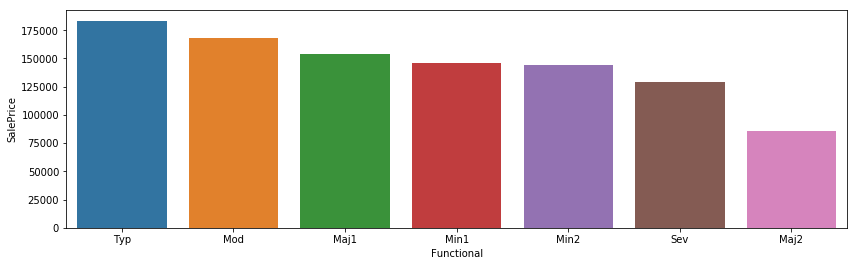

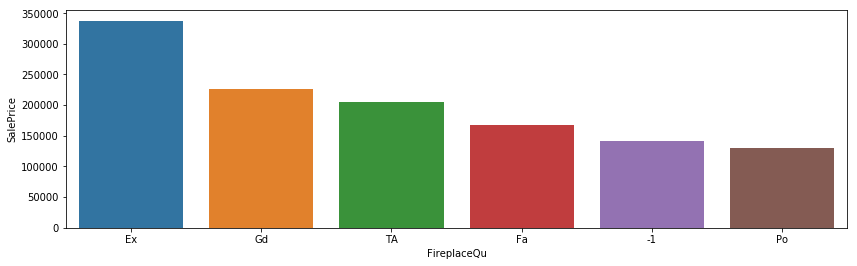

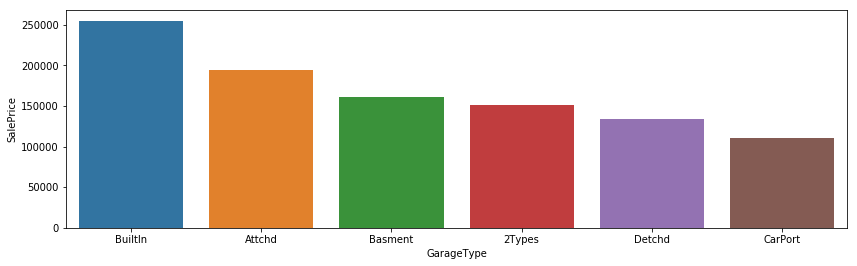

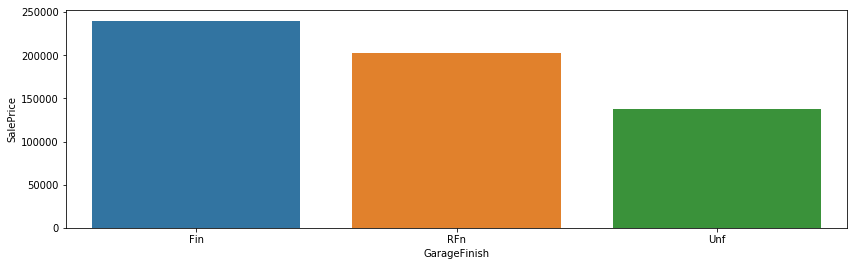

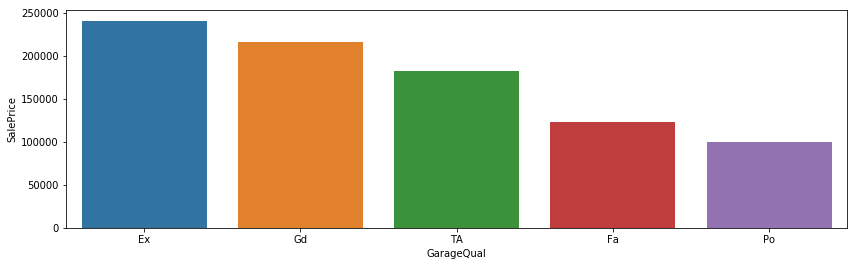

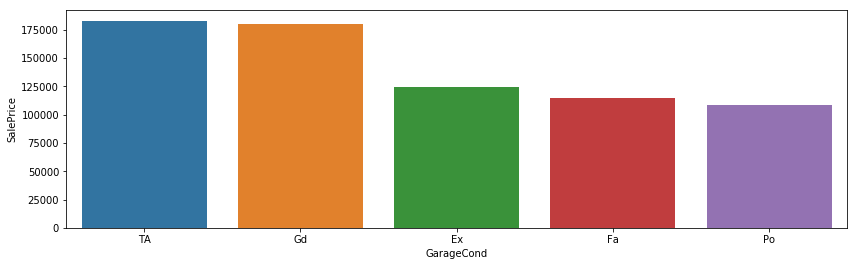

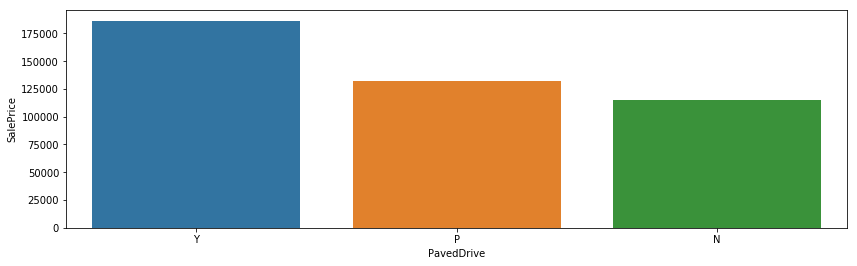

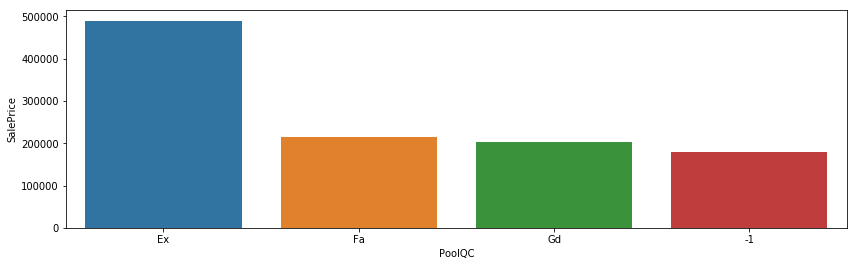

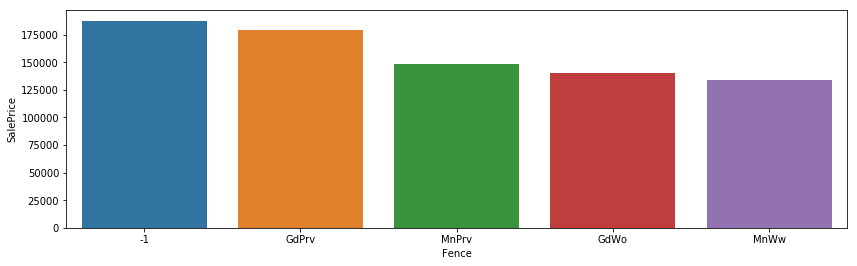

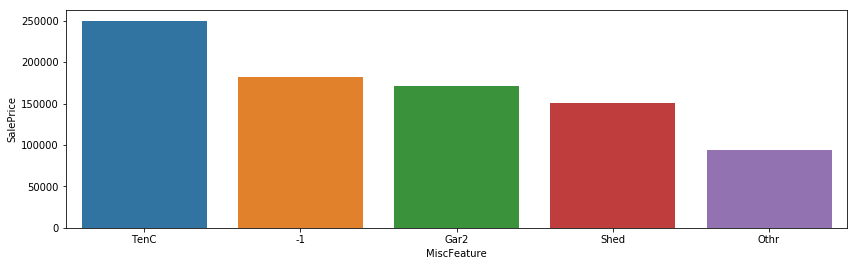

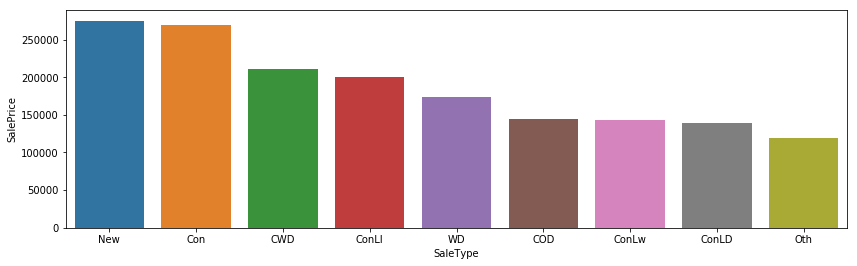

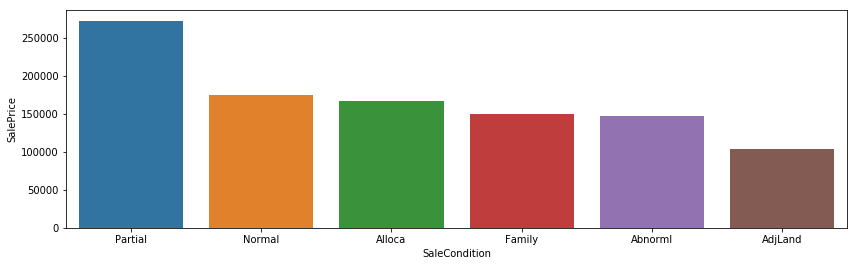

In [28]:
for f in v:
    figure, ax = plt.subplots(nrows =1, ncols =1)
    figure.set_size_inches(14,4)
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'SalePrice']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='SalePrice', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='SalePrice', data=cat_perc, order=cat_perc[f])

## Ordinal Variable

C:\Users\WoolBae\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


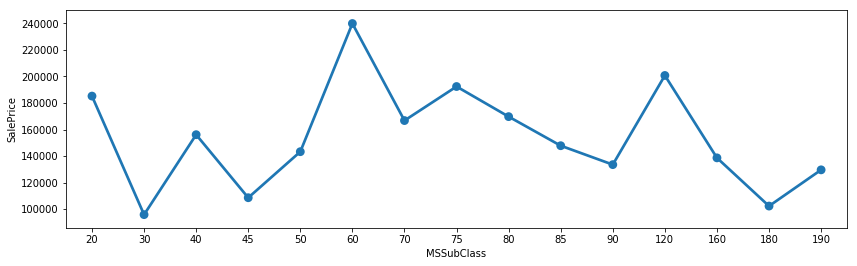

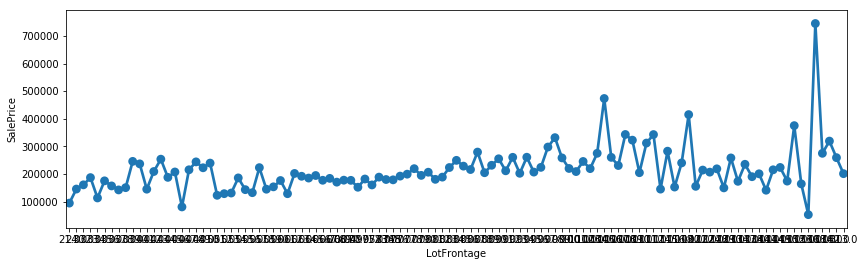

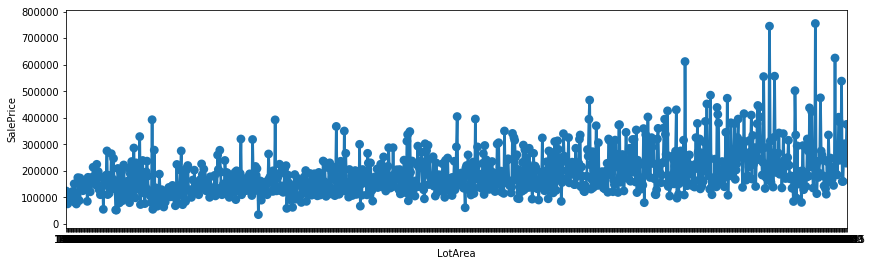

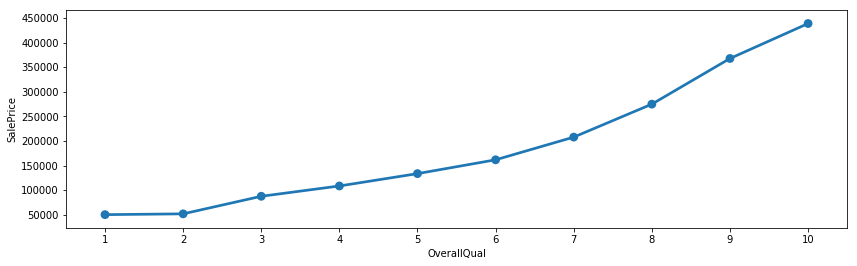

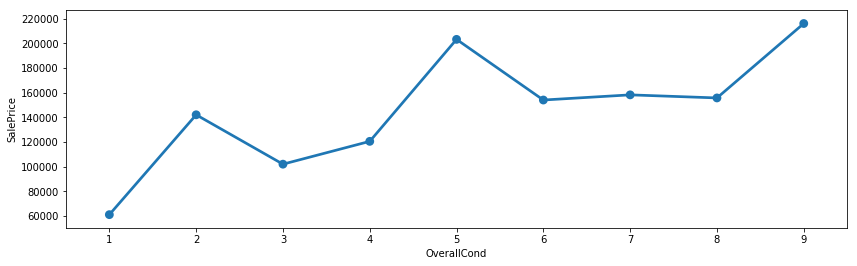

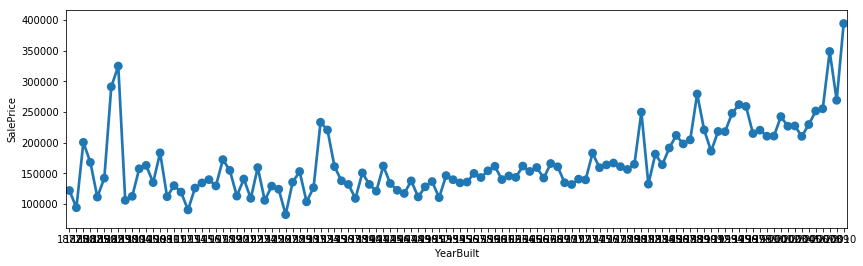

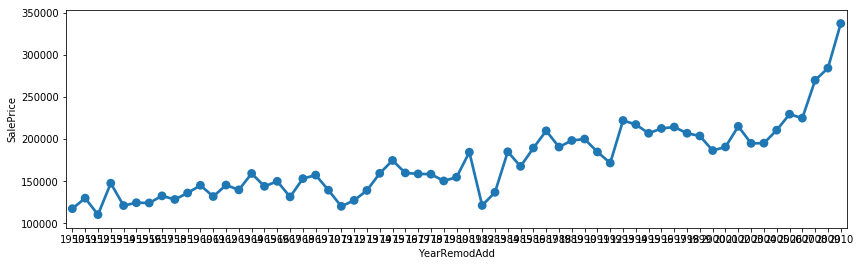

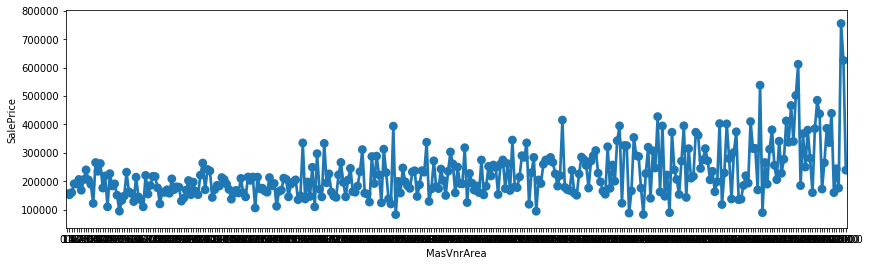

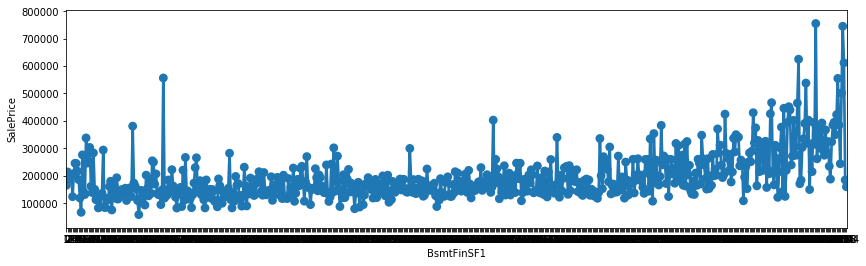

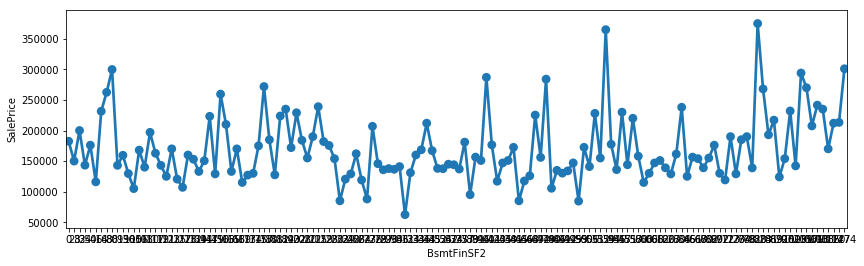

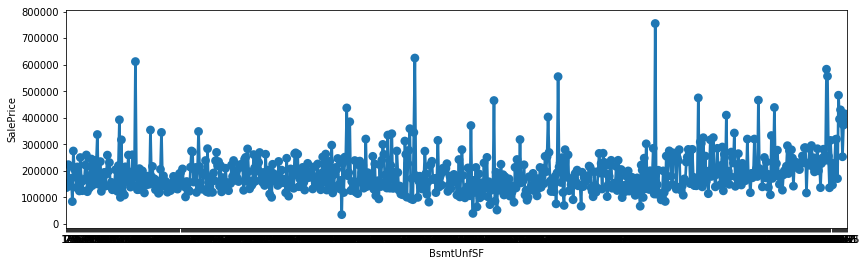

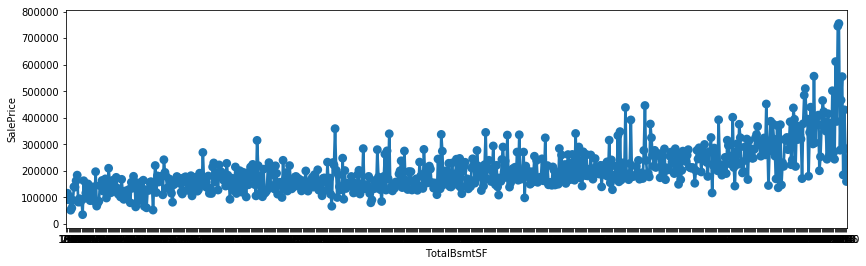

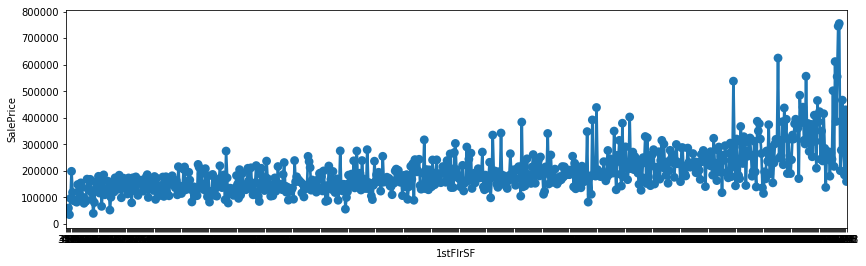

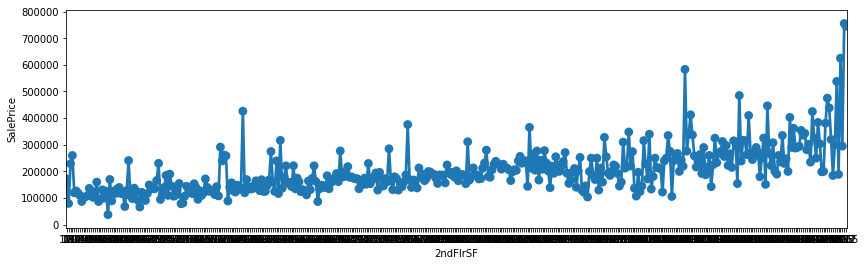

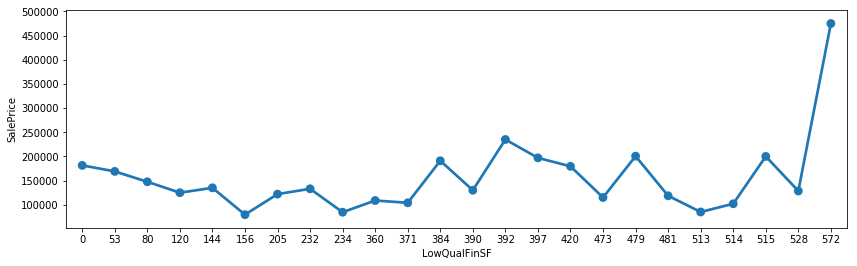

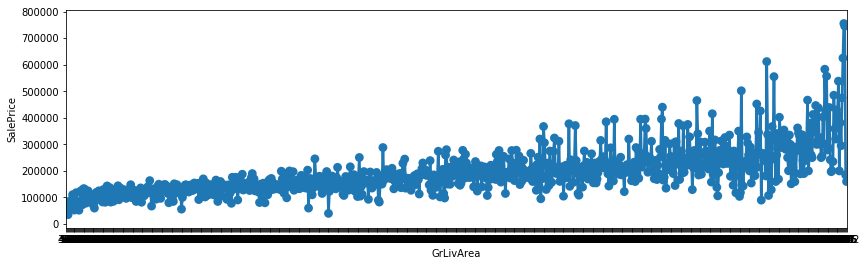

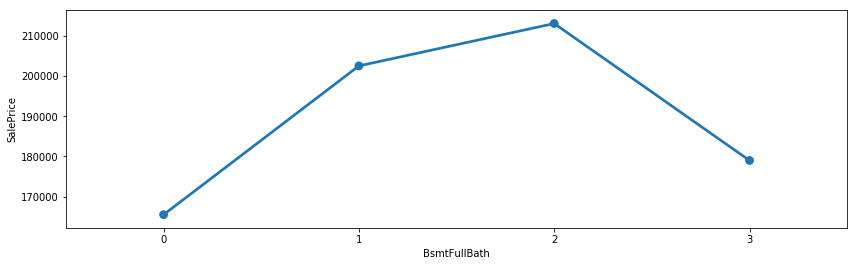

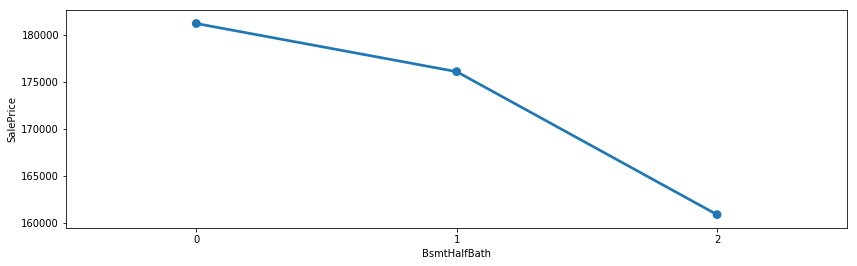

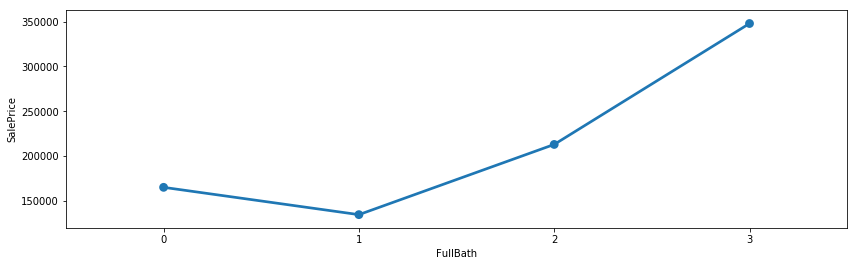

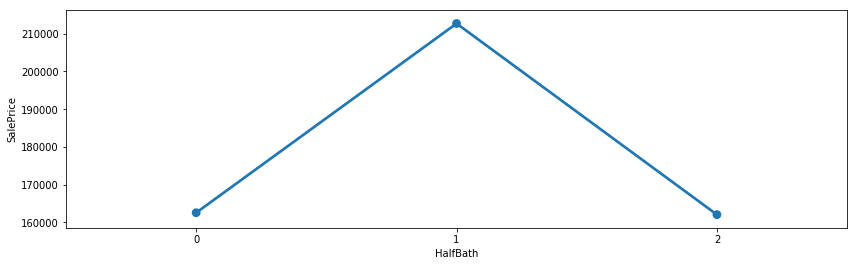

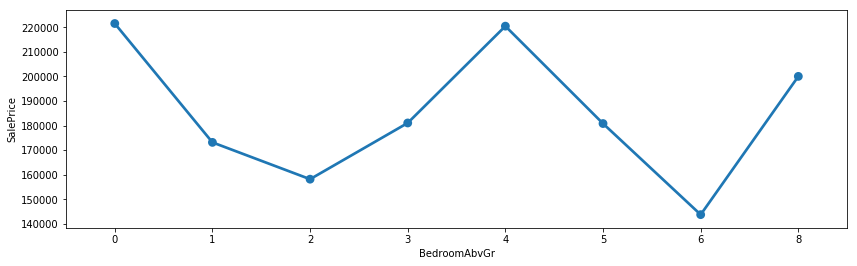

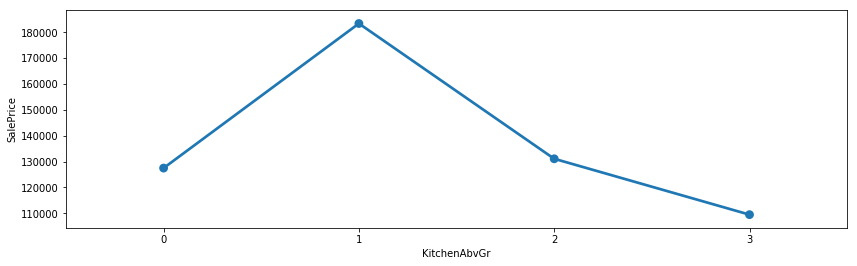

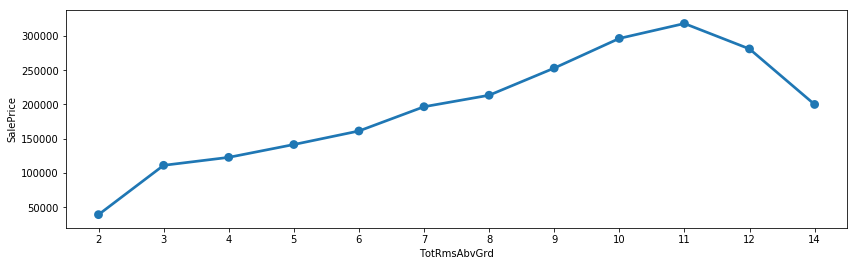

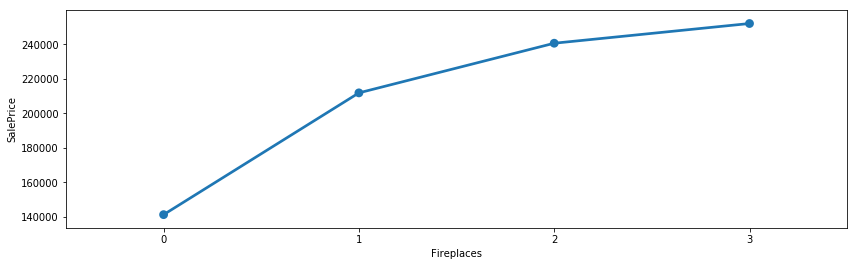

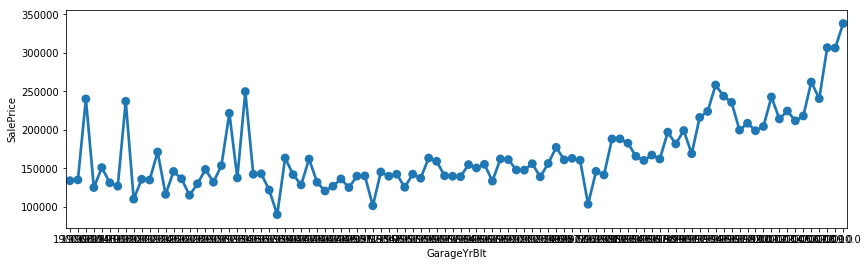

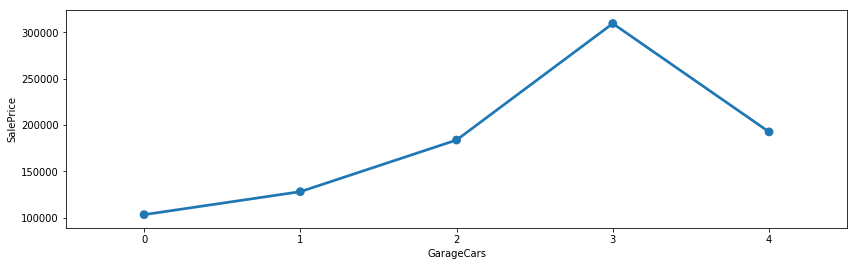

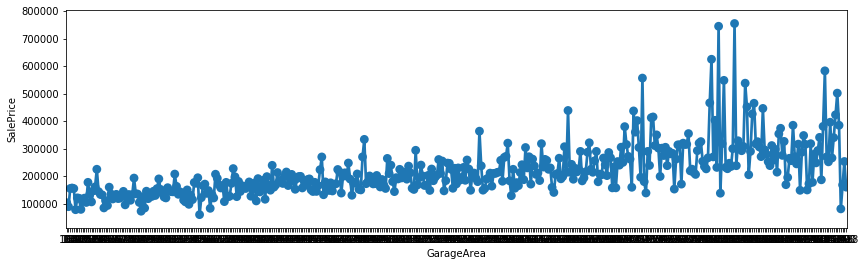

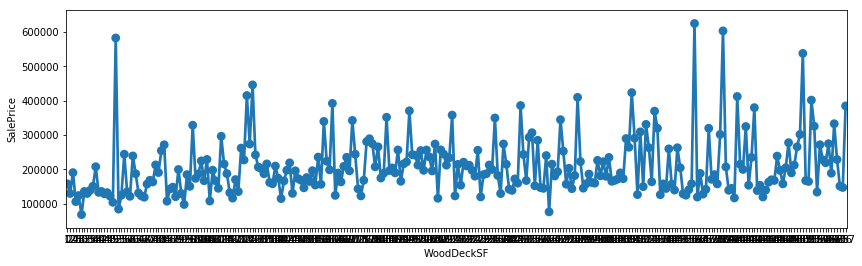

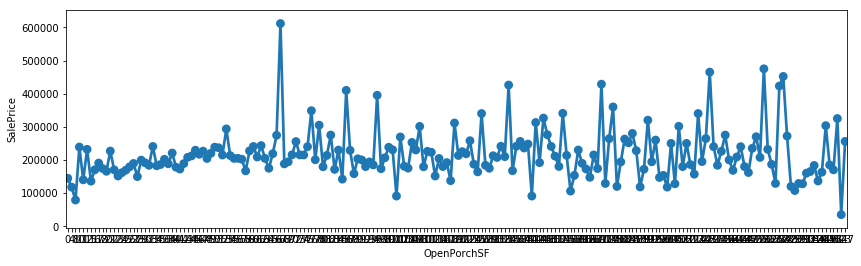

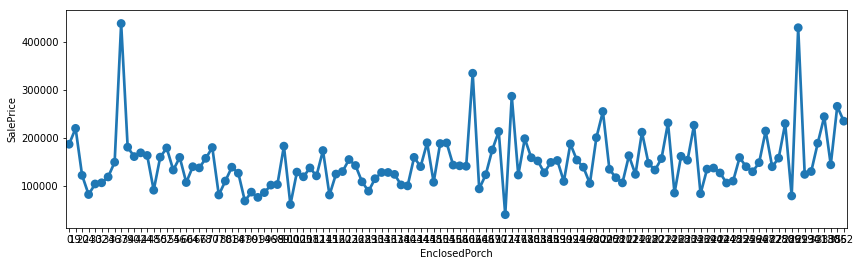

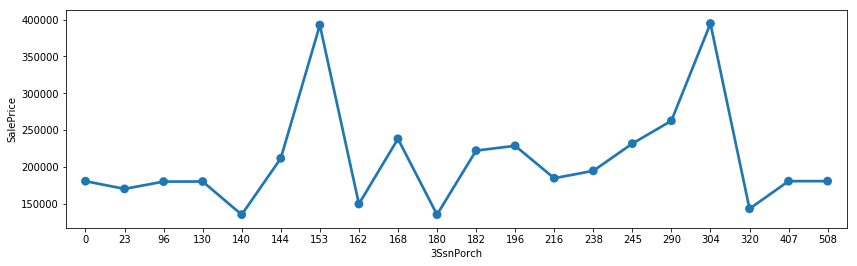

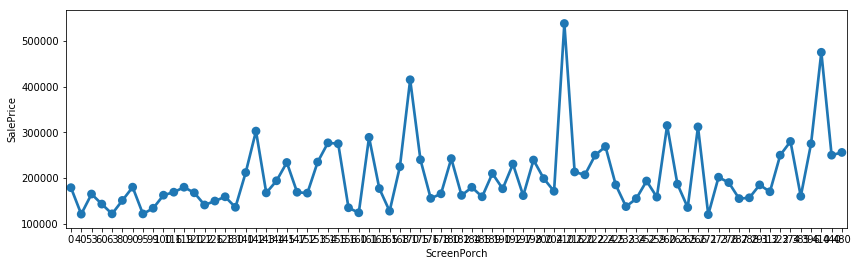

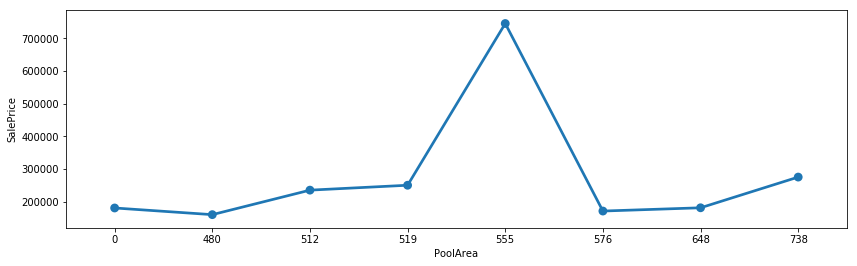

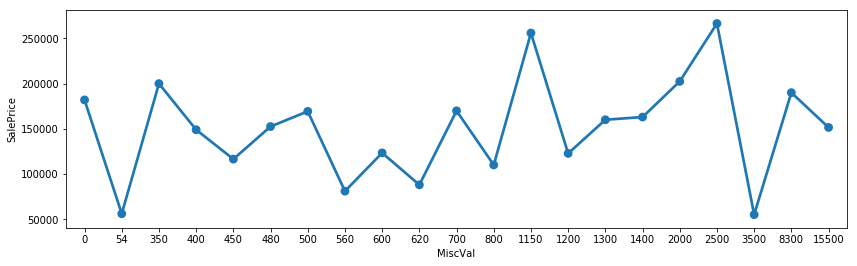

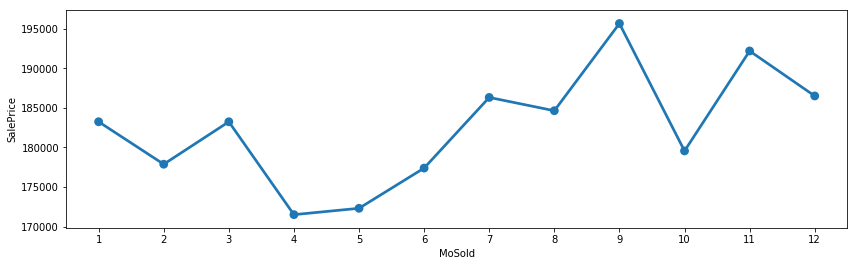

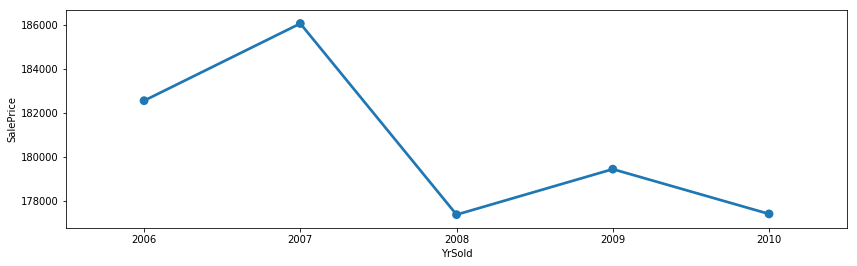

In [31]:
v =meta[(meta["level"] == "ordinal") & meta["keep"]].index

for f in v:
    figure, ax = plt.subplots(nrows =1, ncols =1)
    figure.set_size_inches(14,4)
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'SalePrice']].groupby([f],as_index=False).mean()
    # Bar plot
    # Order the bars descending on target mean
    sns.pointplot(ax=ax, x=f, y='SalePrice', data=cat_perc)

# Checking the correlations between ordinal variables

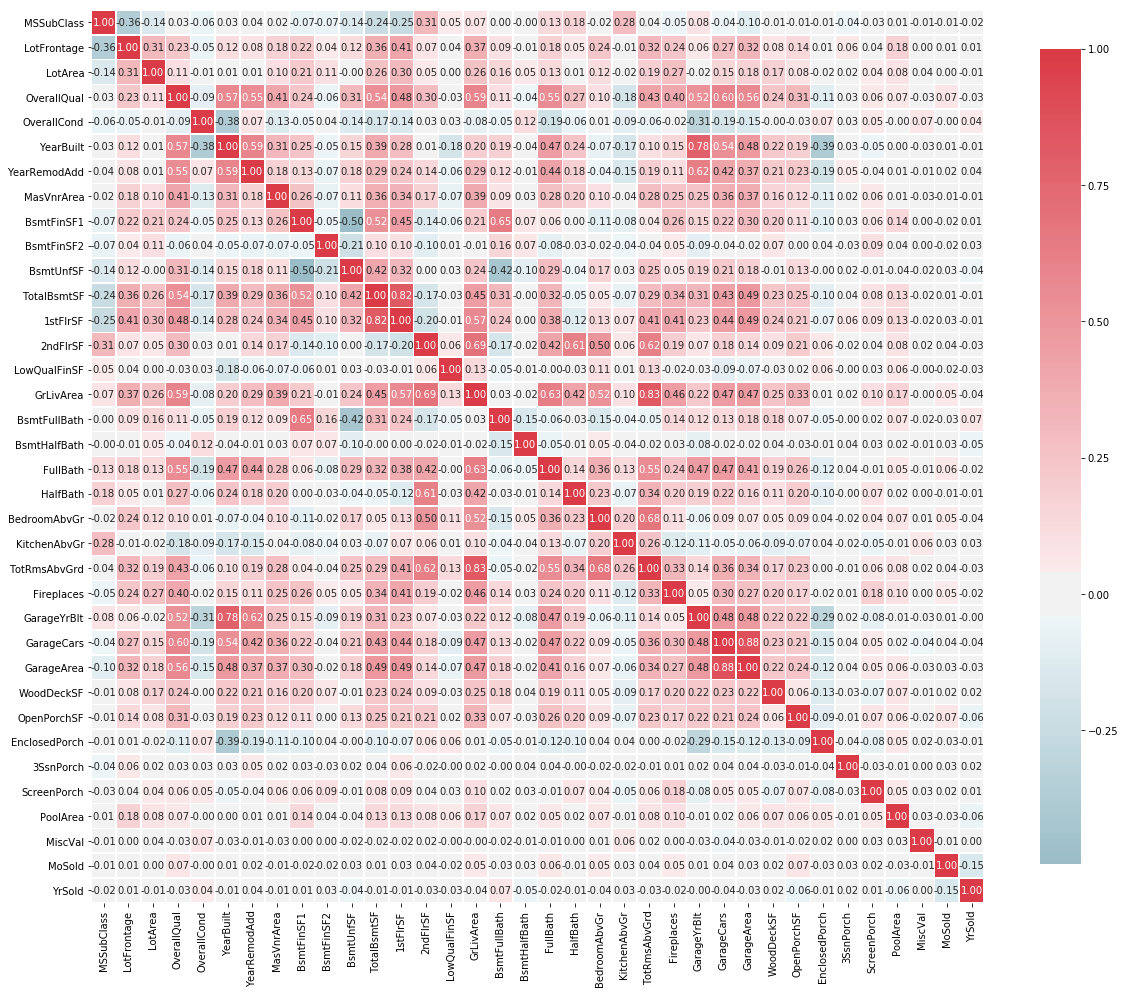

In [32]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

# Feature engineering

### Creating dummy variables

In [207]:
v = meta[(meta["level"] == "nominal") & (meta["keep"])].index
print("Befroe dummification we have {} varialbes in train".format(train.shape[1]))
#train = pd.get_dummies(train, columns= v, drop_first=True)
print("After dummification we have {} variables in train" .format(train.shape[1]))



Befroe dummification we have 236 varialbes in train
After dummification we have 236 variables in train


In [208]:
test = pd.get_dummies(test, columns= v, drop_first=True)

In [209]:
test.shape

(1459, 219)

# Feature Selection

 ### Removing features with low or zero variance

In [210]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['Id', 'SalePrice'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['Id', 'SalePrice'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

68 variables have too low variance.
These variables are ['Street_Pave', 'LotShape_IR3', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'ExterQual_Fa', 'ExterCond_Po', 'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Po', 'BsmtFinType2_GLQ', 'Heati

# Selecting features with a Random Forest and SelectFromModel

#### Here we'll base feature selection on the feature importances of a random forest. 
#### With Sklearn's SelectFromModel you can then specify how many variables you want to keep. We can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables.

In [211]:
X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']

feat_labels = X_train.columns

model = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

model.fit(X_train, y_train)
importances = model.feature_importances_

indices = np.argsort(model.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))
    
    


 1) LotArea                        0.034917
 2) 1stFlrSF                       0.031067
 3) TotalBsmtSF                    0.029462
 4) GrLivArea                      0.029417
 5) GarageArea                     0.028713
 6) BsmtUnfSF                      0.028273
 7) LotFrontage                    0.027873
 8) YearBuilt                      0.027831
 9) YearRemodAdd                   0.026164
10) BsmtFinSF1                     0.024093
11) GarageYrBlt                    0.023952
12) MoSold                         0.022185
13) OpenPorchSF                    0.020591
14) WoodDeckSF                     0.019534
15) TotRmsAbvGrd                   0.018494
16) MasVnrArea                     0.018231
17) 2ndFlrSF                       0.018134
18) YrSold                         0.017583
19) OverallQual                    0.015174
20) OverallCond                    0.014163
21) MSSubClass                     0.012509
22) BedroomAbvGr                   0.012337
23) Fireplaces                  

In [212]:
sfm = SelectFromModel(model, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 234
Number of features after selection: 117


In [213]:
train = train[selected_vars + ['SalePrice']]

In [214]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,PavedDrive_Y,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,1,1,1,0,1,1,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,1,1,1,0,1,1,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,0,1,1,1,0,1,1,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,1,1,1,1,0,1,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,0,1,1,1,0,1,1,0,250000


In [215]:
x_test= test[selected_vars]

# Train

In [216]:
x_train = train.drop(['SalePrice'], axis=1)
y_train = train['SalePrice']
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [217]:
predictions = model.predict(x_test)

In [219]:
len(predictions)

1459

# Submission

In [220]:
submission = pd.read_csv("sample_submission_House.csv")

In [222]:
submission["SalePrice"] = predictions

In [225]:
submission.to_csv("First_sub.csv")

In [230]:
submmit = submission.set_index("Id")
submmit.to_csv("First_sub.csv")